# Testing the effect of *Dropout Rates* with Different Layers

*This notebook uses the **Dog or Cat** data set available [here](http://files.fast.ai/data/dogscats.zip)*

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Using the same data set as Deep Learning Part 1 - lesson 1
PATH = "data/dogscats/"
# Select an image model
arch=resnet50
# Set to the number of CPU Cores you have
workers=8
# this is an array we will iterate through to test each one
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
bestdrop = 0.2 # established in previous notebook so it will be our static dropout rate
# these variables are used for capturing results
los1 = []
acc1 = []
los2 = []
acc2 = []

In [14]:
sz=64 # unchanged
bs=512 # batch size
learnrate = 1e-1 #0.1

In [15]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=workers)

## Dropout Layers in Model

In [16]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=bestdrop)
learn

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      )
    )
    (1): Bot

## Learning Rate

epoch      trn_loss   val_loss   accuracy                                                                           
    0      2.009321   189.242641 0.5       



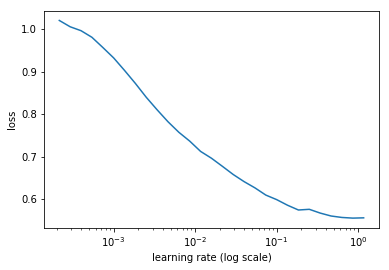

In [17]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=[0,bestdrop])
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

epoch      trn_loss   val_loss   accuracy                                                                           
    0      1.191208   343.566109 0.5       



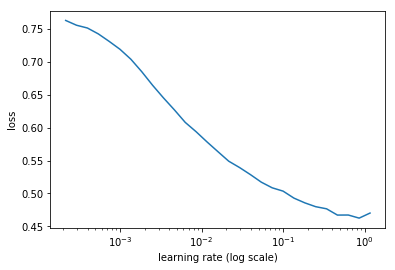

In [18]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=[bestdrop,0])
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

## Run Tests

In [19]:
#### Dropout change in first layer only ####
#loop through all entries in the dropouts array
for dropout in dropouts:
    learn = ConvLearner.pretrained(arch, data, precompute=False, ps=[dropout,bestdrop])
    
    print('Dropout Rates: ',dropout,',',bestdrop)
    # Make sure we have enough cycles and due to dropout variability, let's make sure we are mixing things up a bit
    %time fit_array = learn.fit(learnrate, 3, cycle_len=1, cycle_mult=2)
    
    # learn.fit actually returns an array that looks like this: [[0.1983260258436203],0.9185000009536743]
    # it includes that last val_loss and accuracy values
    accuracy = fit_array[1]
    loss = fit_array[0][0]
    # add them to our arrays for charting later
    acc1.append(accuracy)
    los1.append(loss)

Dropout Rates:  0.0 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.303878   0.227988   0.9055    
    1      0.243985   0.214249   0.9085                                                                             
    2      0.205326   0.199354   0.9135                                                                             
    3      0.192328   0.212702   0.9045                                                                             
    4      0.177004   0.192859   0.9195                                                                             
    5      0.163256   0.194287   0.92                                                                               
    6      0.151689   0.193413   0.9195                                                                             

Wall time: 6min 55s
Dropout Rates:  0.1 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.309594   0.224959   0.906     
    1      0.247907   0.219269   0.906                                                                              
    2      0.206213   0.206408   0.9075                                                                             
    3      0.194986   0.209068   0.9105                                                                             
    4      0.186253   0.197437   0.918                                                                              
    5      0.171879   0.194021   0.9175                                                                             
    6      0.160499   0.192691   0.92                                                                               

Wall time: 6min 49s
Dropout Rates:  0.2 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.319862   0.244444   0.905     
    1      0.248632   0.212425   0.9095                                                                             
    2      0.211615   0.203001   0.9095                                                                             
    3      0.199168   0.201551   0.917                                                                              
    4      0.188957   0.195001   0.919                                                                              
    5      0.179215   0.196493   0.9185                                                                             
    6      0.170379   0.197209   0.9185                                                                             

Wall time: 6min 56s
Dropout Rates:  0.3 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.32999    0.23942    0.8955    
    1      0.256809   0.207669   0.906                                                                              
    2      0.219265   0.203033   0.9085                                                                             
    3      0.206373   0.212523   0.9085                                                                             
    4      0.196217   0.200754   0.9145                                                                             
    5      0.183996   0.196656   0.914                                                                              
    6      0.176317   0.19558    0.918                                                                              

Wall time: 6min 53s
Dropout Rates:  0.4 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.315836   0.22914    0.9       
    1      0.256515   0.21579    0.907                                                                              
    2      0.224311   0.203898   0.905                                                                              
    3      0.213707   0.208155   0.908                                                                              
    4      0.205924   0.203783   0.9125                                                                             
    5      0.194355   0.20014    0.914                                                                              
    6      0.186111   0.198662   0.914                                                                              

Wall time: 6min 58s
Dropout Rates:  0.5 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.323482   0.229775   0.9025    
    1      0.261353   0.208002   0.9065                                                                             
    2      0.230841   0.203886   0.91                                                                               
    3      0.217315   0.204955   0.9095                                                                             
    4      0.205044   0.200476   0.9155                                                                             
    5      0.19916    0.198277   0.9155                                                                             
    6      0.192588   0.197665   0.9165                                                                             

Wall time: 6min 58s
Dropout Rates:  0.6 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.341463   0.237467   0.9075    
    1      0.266856   0.209285   0.901                                                                              
    2      0.234631   0.207032   0.905                                                                              
    3      0.227007   0.207318   0.9045                                                                             
    4      0.217617   0.202663   0.9135                                                                             
    5      0.207251   0.201904   0.911                                                                              
    6      0.204192   0.201263   0.911                                                                              

Wall time: 6min 55s
Dropout Rates:  0.7 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.317932   0.236734   0.9015    
    1      0.2641     0.208943   0.91                                                                               
    2      0.237518   0.210137   0.91                                                                               
    3      0.229365   0.204188   0.913                                                                              
    4      0.225191   0.204893   0.914                                                                              
    5      0.216041   0.204115   0.9075                                                                             
    6      0.215323   0.20267    0.911                                                                              

Wall time: 6min 51s
Dropout Rates:  0.8 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.326465   0.237847   0.895     
    1      0.272625   0.219451   0.9005                                                                             
    2      0.253556   0.22013    0.9005                                                                             
    3      0.247894   0.234166   0.895                                                                              
    4      0.239102   0.219238   0.9025                                                                             
    5      0.234814   0.211871   0.9015                                                                             
    6      0.232849   0.215401   0.9                                                                                

Wall time: 6min 48s
Dropout Rates:  0.9 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.348256   0.263548   0.888     
    1      0.301808   0.232393   0.902                                                                              
    2      0.284511   0.243981   0.9005                                                                             
    3      0.276393   0.237538   0.899                                                                              
    4      0.270625   0.234538   0.899                                                                              
    5      0.26429    0.230781   0.902                                                                              
    6      0.262478   0.227491   0.9015                                                                             

Wall time: 6min 55s


In [20]:
#### Dropout change in second layer only ####
#loop through all entries in the dropouts array
for dropout in dropouts:
    learn = ConvLearner.pretrained(arch, data, precompute=False, ps=[bestdrop,dropout])
    
    print('Dropout Rates: ',bestdrop,',',dropout)
    # Make sure we have enough cycles and due to dropout variability, let's make sure we are mixing things up a bit
    %time fit_array = learn.fit(learnrate, 3, cycle_len=1, cycle_mult=2)
    
    # learn.fit actually returns an array that looks like this: [[0.1983260258436203],0.9185000009536743]
    # it includes that last val_loss and accuracy values
    accuracy = fit_array[1]
    loss = fit_array[0][0]
    # add them to our arrays for charting later
    acc2.append(accuracy)
    los2.append(loss)

Dropout Rates:  0.2 , 0.0


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.300303   0.231621   0.901     
    1      0.232031   0.205203   0.912                                                                              
    2      0.197552   0.200957   0.914                                                                              
    3      0.192768   0.203425   0.91                                                                               
    4      0.181791   0.199931   0.915                                                                              
    5      0.16948    0.195858   0.916                                                                              
    6      0.156255   0.196938   0.917                                                                              

Wall time: 6min 50s
Dropout Rates:  0.2 , 0.1


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.289705   0.237337   0.893     
    1      0.24122    0.211219   0.905                                                                              
    2      0.206072   0.204894   0.91                                                                               
    3      0.196584   0.20126    0.912                                                                              
    4      0.185528   0.201219   0.913                                                                              
    5      0.174518   0.201817   0.9145                                                                             
    6      0.164939   0.194637   0.9155                                                                             

Wall time: 6min 54s
Dropout Rates:  0.2 , 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.348972   0.244578   0.9025    
    1      0.272884   0.221429   0.901                                                                              
    2      0.226449   0.205942   0.907                                                                              
    3      0.210376   0.208685   0.9045                                                                             
    4      0.196556   0.208155   0.9125                                                                             
    5      0.180417   0.201237   0.912                                                                              
    6      0.171894   0.201693   0.912                                                                              

Wall time: 6min 54s
Dropout Rates:  0.2 , 0.3


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.301272   0.237222   0.9005    
    1      0.246108   0.204351   0.911                                                                              
    2      0.212907   0.198214   0.915                                                                              
    3      0.202543   0.201803   0.9175                                                                             
    4      0.191923   0.202305   0.9155                                                                             
    5      0.181539   0.196462   0.9185                                                                             
    6      0.174463   0.195055   0.9165                                                                             

Wall time: 6min 56s
Dropout Rates:  0.2 , 0.4


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.326852   0.231784   0.906     
    1      0.26047    0.215416   0.9055                                                                             
    2      0.220017   0.205959   0.9085                                                                             
    3      0.208828   0.201269   0.913                                                                              
    4      0.196196   0.201447   0.915                                                                              
    5      0.186011   0.197928   0.9135                                                                             
    6      0.180733   0.196891   0.9135                                                                             

Wall time: 7min 2s
Dropout Rates:  0.2 , 0.5


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.37176    0.239658   0.902     
    1      0.281254   0.202655   0.9095                                                                             
    2      0.231406   0.201771   0.9135                                                                             
    3      0.213458   0.198017   0.919                                                                              
    4      0.203841   0.200581   0.916                                                                              
    5      0.193097   0.197531   0.917                                                                              
    6      0.184742   0.197811   0.9185                                                                             

Wall time: 6min 51s
Dropout Rates:  0.2 , 0.6


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.384612   0.249667   0.901     
    1      0.279913   0.213573   0.906                                                                              
    2      0.236065   0.208712   0.908                                                                              
    3      0.221534   0.207553   0.91                                                                               
    4      0.209181   0.207392   0.9105                                                                             
    5      0.199564   0.200132   0.913                                                                              
    6      0.193738   0.200706   0.912                                                                              

Wall time: 6min 59s
Dropout Rates:  0.2 , 0.7


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.418745   0.249887   0.906     
    1      0.301914   0.211515   0.9075                                                                             
    2      0.247965   0.20563    0.908                                                                              
    3      0.231318   0.213517   0.9045                                                                             
    4      0.220172   0.207903   0.9075                                                                             
    5      0.209209   0.201761   0.912                                                                              
    6      0.201078   0.20101    0.9105                                                                             

Wall time: 6min 58s
Dropout Rates:  0.2 , 0.8


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.496897   0.270431   0.898     
    1      0.331633   0.209315   0.905                                                                              
    2      0.264348   0.207294   0.9085                                                                             
    3      0.24481    0.208409   0.905                                                                              
    4      0.233931   0.215148   0.9035                                                                             
    5      0.220217   0.203207   0.908                                                                              
    6      0.210385   0.203535   0.909                                                                              

Wall time: 7min 2s
Dropout Rates:  0.2 , 0.9


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.575522   0.269918   0.899     
    1      0.380822   0.229565   0.8995                                                                             
    2      0.299495   0.216372   0.908                                                                              
    3      0.277865   0.21847    0.907                                                                              
    4      0.262767   0.20972    0.912                                                                              
    5      0.243484   0.207954   0.9105                                                                             
    6      0.233652   0.20904    0.9075                                                                             

Wall time: 7min 3s


In [21]:
print(dropouts)
# dropout changes in first layer
print(acc1) 
print(los1)
# dropout changes in second layer
print(acc2)
print(los2)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.9194999985694885, 0.9200000009536743, 0.9184999952316284, 0.9179999985694886, 0.9140000038146973, 0.9164999952316284, 0.9109999976158142, 0.9110000057220459, 0.8999999985694885, 0.9015000066757202]
[0.19341319370269774, 0.19269148707389833, 0.19720906472206115, 0.19557973504066467, 0.19866210913658142, 0.1976653196811676, 0.2012625241279602, 0.20267004132270813, 0.21540107226371766, 0.22749121689796448]
[0.9169999961853027, 0.915500006198883, 0.9120000066757202, 0.9165000066757202, 0.9134999952316284, 0.9184999957084655, 0.9120000061988831, 0.910500006198883, 0.9090000009536743, 0.9074999952316284]
[0.1969375902414322, 0.19463720428943634, 0.20169334506988526, 0.19505501532554625, 0.19689125537872315, 0.19781051659584045, 0.20070613944530488, 0.2010102038383484, 0.20353524327278139, 0.20904021191596986]


In [22]:
#cheatsheet of results
#acc1 = 
#acc2 = 

## Interpreting Results

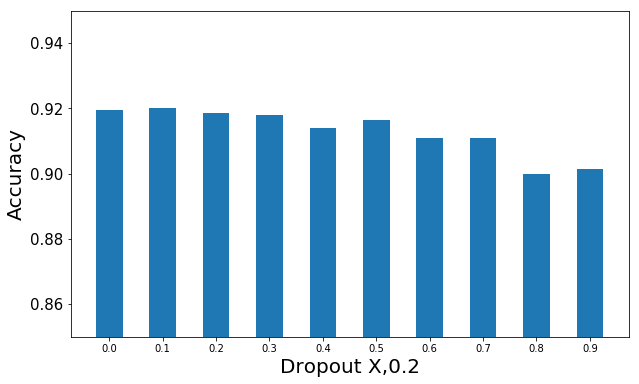

In [25]:
width = 0.05 # bar width
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set new size (0=width,1=height)
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.bar(dropouts, acc1, width, align='center')

plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=15)

xrange = np.arange(0,1,.1)
plt.xticks(xrange, dropouts)
plt.ylim(.85,.95)

plt.xlabel('Dropout X,0.2', size = 20)
plt.ylabel('Accuracy',size = 20)

plt.show()

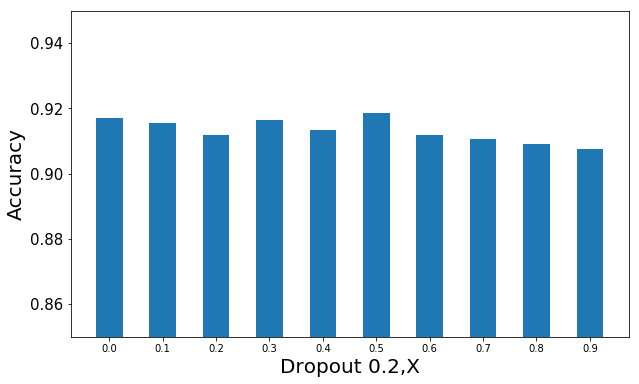

In [26]:
plt.bar(dropouts, acc2, width, align='center')

plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=15)

xrange = np.arange(0,1,.1)
plt.xticks(xrange, dropouts)
plt.ylim(.85,.95)

plt.xlabel('Dropout 0.2,X', size = 20)
plt.ylabel('Accuracy',size = 20)

plt.show()